# ML Introduction Exercise

## Import and Load Data

In [316]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, ParameterGrid
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
pd.options.display.max_rows = 50
url = 'https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/classification/data/Assigment/aug_train.csv'
train_df = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/classification/data/Assigment/aug_test.csv'
test_df  = pd.read_csv(url)



## Task 1 Data clean, imputation

### Train Data

In [317]:
train_df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,Male,No relevent experience,no_enrollment,High School,NaN,5,NaN,never,21,0
1,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,>4,12,0
2,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Public Sector,>4,26,0
3,0.624,Male,No relevent experience,Full time course,High School,NaN,1,NaN,never,30,1
4,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,>20,NaN,>4,46,0


In [318]:
train_df.describe(include='all')


,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
count,2100.000000,1585,2100,2051,2049,1768,2090,1415,2048,2100.000000,2100.000000
unique,NaN,3,2,3,5,6,22,6,6,NaN,NaN
top,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Pvt Ltd,1,NaN,NaN
freq,NaN,1422,1507,1484,1246,1556,369,1068,857,NaN,NaN
mean,0.826898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.896190,0.254762
std,0.124464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.432483,0.435831
min,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,0.729250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,0.000000
50%,0.899000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,0.000000
75%,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.250000,1.000000


In [319]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2100 non-null   float64
 1   gender                  1585 non-null   object 
 2   relevent_experience     2100 non-null   object 
 3   enrolled_university     2051 non-null   object 
 4   education_level         2049 non-null   object 
 5   major_discipline        1768 non-null   object 
 6   experience              2090 non-null   object 
 7   company_type            1415 non-null   object 
 8   last_new_job            2048 non-null   object 
 9   training_hours          2100 non-null   int64  
 10  target                  2100 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 180.6+ KB


In [320]:
# Replace values in 'experience' and 'last_new_job'
train_df['experience'] = train_df['experience'].replace({'>20': 21, '<1': 1}).astype(float)
train_df['last_new_job'] = train_df['last_new_job'].replace({'never': 0, '>4': 5}).astype(float)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2100 non-null   float64
 1   gender                  1585 non-null   object 
 2   relevent_experience     2100 non-null   object 
 3   enrolled_university     2051 non-null   object 
 4   education_level         2049 non-null   object 
 5   major_discipline        1768 non-null   object 
 6   experience              2090 non-null   float64
 7   company_type            1415 non-null   object 
 8   last_new_job            2048 non-null   float64
 9   training_hours          2100 non-null   int64  
 10  target                  2100 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 180.6+ KB


In [321]:

# function to fill the missing values
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            # fill with mode for categorical columns
            #print("object - " + column)
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            # fill with median for numerical columns
            #print("numerical - " + column)
            df[column].fillna(df[column].median(), inplace=True)
    return df

# Apply the function to the training data
train_df = fill_missing_values(train_df)

# Check the result
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2100 non-null   float64
 1   gender                  2100 non-null   object 
 2   relevent_experience     2100 non-null   object 
 3   enrolled_university     2100 non-null   object 
 4   education_level         2100 non-null   object 
 5   major_discipline        2100 non-null   object 
 6   experience              2100 non-null   float64
 7   company_type            2100 non-null   object 
 8   last_new_job            2100 non-null   float64
 9   training_hours          2100 non-null   int64  
 10  target                  2100 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 180.6+ KB


In [322]:
train_df.isna().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### Test data

In [323]:
test_df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,NaN,Has relevent experience,Full time course,Graduate,Other,3,Pvt Ltd,1,134,0
1,0.920,Female,No relevent experience,no_enrollment,Graduate,STEM,5,Early Stage Startup,1,34,1
2,0.767,NaN,Has relevent experience,Full time course,Graduate,STEM,10,Pvt Ltd,2,90,0
3,0.910,Male,No relevent experience,NaN,High School,NaN,10,NaN,never,42,0
4,0.624,Male,Has relevent experience,Part time course,Graduate,STEM,3,Pvt Ltd,1,198,0


In [324]:
test_df.describe(include='all')

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
count,100.000000,72,100,96,98,88,100,64,100,100.000000,100.000000
unique,NaN,3,2,3,3,5,20,5,6,NaN,NaN
top,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Pvt Ltd,1,NaN,NaN
freq,NaN,68,66,67,63,82,17,50,40,NaN,NaN
mean,0.844220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.280000,0.220000
std,0.117719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.813498,0.416333
min,0.479000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000
25%,0.794750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,0.000000
50%,0.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.500000,0.000000
75%,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.000000,0.000000


In [325]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  100 non-null    float64
 1   gender                  72 non-null     object 
 2   relevent_experience     100 non-null    object 
 3   enrolled_university     96 non-null     object 
 4   education_level         98 non-null     object 
 5   major_discipline        88 non-null     object 
 6   experience              100 non-null    object 
 7   company_type            64 non-null     object 
 8   last_new_job            100 non-null    object 
 9   training_hours          100 non-null    int64  
 10  target                  100 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 8.7+ KB


In [326]:
# Replace values in 'experience' and 'last_new_job'
test_df['experience'] = test_df['experience'].replace({'>20': 21, '<1': 1}).astype(float)
test_df['last_new_job'] = test_df['last_new_job'].replace({'never': 0, '>4': 5}).astype(float)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  100 non-null    float64
 1   gender                  72 non-null     object 
 2   relevent_experience     100 non-null    object 
 3   enrolled_university     96 non-null     object 
 4   education_level         98 non-null     object 
 5   major_discipline        88 non-null     object 
 6   experience              100 non-null    float64
 7   company_type            64 non-null     object 
 8   last_new_job            100 non-null    float64
 9   training_hours          100 non-null    int64  
 10  target                  100 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 8.7+ KB


In [327]:
#fill missing values
test_df = fill_missing_values(test_df)

# Check the result
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  100 non-null    float64
 1   gender                  100 non-null    object 
 2   relevent_experience     100 non-null    object 
 3   enrolled_university     100 non-null    object 
 4   education_level         100 non-null    object 
 5   major_discipline        100 non-null    object 
 6   experience              100 non-null    float64
 7   company_type            100 non-null    object 
 8   last_new_job            100 non-null    float64
 9   training_hours          100 non-null    int64  
 10  target                  100 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 8.7+ KB


In [328]:
test_df.isna().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [329]:
# Encode categorical features (all columns that are not numerical)
label_encoders = {}
for column in train_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    train_df[column] = label_encoders[column].fit_transform(train_df[column])
    test_df[column] = label_encoders[column].transform(test_df[column])
    print(f"Column '{column}':")
    for original_category, encoded_value in zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_)):
        print(f"\t{original_category}: {encoded_value}")

Column 'gender':
	Female: 0
	Male: 1
	Other: 2
Column 'relevent_experience':
	Has relevent experience: 0
	No relevent experience: 1
Column 'enrolled_university':
	Full time course: 0
	Part time course: 1
	no_enrollment: 2
Column 'education_level':
	Graduate: 0
	High School: 1
	Masters: 2
	Phd: 3
	Primary School: 4
Column 'major_discipline':
	Arts: 0
	Business Degree: 1
	Humanities: 2
	No Major: 3
	Other: 4
	STEM: 5
Column 'company_type':
	Early Stage Startup: 0
	Funded Startup: 1
	NGO: 2
	Other: 3
	Public Sector: 4
	Pvt Ltd: 5


## Task 2 Classification

###  Build a classification model from the training set ( you can use any algorithms)

In [330]:
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_test = test_df.drop(columns=['target'])
y_test = test_df['target']

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
trees = 100
max_features = 3
results = []
names_of_models = []

model_list = [('LR', LogisticRegression()),
             ('KNN', KNeighborsClassifier()),
             ('DTC', DecisionTreeClassifier()),
             ('RFC', RandomForestClassifier(n_estimators=trees,max_features=3))]


for name, model in model_list:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, scaled_X_train, y_train, cv=kfold, scoring='precision')
    results.append(cv_results)
    names_of_models.append(name)
    res = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(res)


LR: 0.5881508868092384 (0.07791280761124349)
KNN: 0.49390725746300185 (0.07669634169817702)
DTC: 0.36236340022520674 (0.04619209581820291)
RFC: 0.5391640396348402 (0.06574243881794475)


The LR algorithm has the best accuracy here with 0.59, so we use this

In [331]:

# Train the model
model = LogisticRegression(random_state=42)
model.fit(scaled_X_train, y_train)

LogisticRegression(random_state=42)

### Generate the confusion matrix and calculate the accuracy, precision, recall, and F1-score on training set. 

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1565
           1       0.59      0.29      0.39       535

    accuracy                           0.77      2100
   macro avg       0.69      0.61      0.62      2100
weighted avg       0.74      0.77      0.74      2100

Confusion Matrix:
 [[1458  107]
 [ 379  156]]


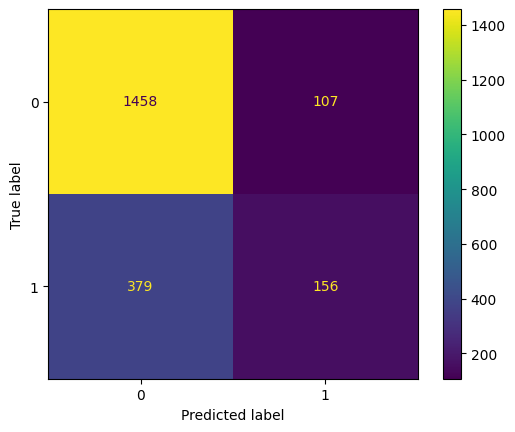

In [332]:

# Predictions on the training set
y_train_pred = model.predict(scaled_X_train)
print(classification_report(y_train,y_train_pred))

print("Confusion Matrix:\n",  confusion_matrix(y_train, y_train_pred))
train_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_train_pred),
                               display_labels=model.classes_)

train_disp.plot()




### Applying the model in the test set and generating the prediction

In [333]:
# Predictions on the test set
y_test_pred = model.predict(scaled_X_test)

### Generate the confusion matrix from the test set and calculate the accuracy, precision, recall, and F1-score

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        78
           1       0.57      0.18      0.28        22

    accuracy                           0.79       100
   macro avg       0.69      0.57      0.58       100
weighted avg       0.75      0.79      0.74       100

Confusion Matrix:/n [[75  3]
 [18  4]]


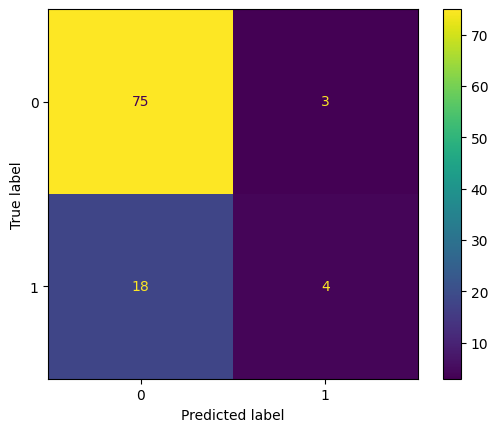

In [334]:


print(classification_report(y_test,y_test_pred))

print("Confusion Matrix:/n",  confusion_matrix(y_test, y_test_pred))
train_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred),
                               display_labels=model.classes_)
train_disp.plot()

### compare the results between the training and test set

77% of the model's predictions on the training set are correct. The precision of class 1 is low, which means that many examples were incorrectly classified as positive. Additionally, the low recall indicates that many positive examples are not correctly classified as positive. The values for class 0 are better in both categories.

The F1-score shows the balance between these two values. We can see that the prediction for class 0 is good, but for class 1, the value of 0.39 is too low, so the prediction is poor.

The test data shows a similar result to the training data.

The model has difficulty identifying the positive class (1). This could be due to a class imbalance in the data, with the negative class (0) being overrepresented.

## Extra points 
think about what kind of the method can increase the performance (does not need to run )

We could use  Hyperparameter tuning to improve the performance of the model, adjust the class weights in the model to compensate the imbalance.